#  pipeline structure :

1.Importing libraries and loading the data

2.Exploratory Data Analysis

3.Feature Engineering

4.Feature Selection

5.Model Building

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')


In [35]:
pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',5000)

In [36]:
df =pd.read_csv('train.csv')

In [37]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
continous_feature = [feature for feature in df if len(df[feature].unique()) > 80 
                                                                     and feature not in year_feature + ['Id']]

print('Number of train continous feature : ',len(continous_feature))  
continous_feature

Number of train continous feature :  15


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice']

In [39]:
train_continous_feature = df[continous_feature]
train_continous_feature.tail()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
1455,62.0,7917,0.0,0,0,953,953,953,694,1647,460,0,40,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,2073,500,349,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,2340,252,0,60,0,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,1078,240,366,0,112,142125
1459,75.0,9937,0.0,830,290,136,1256,1256,0,1256,276,736,68,0,147500


In [40]:
train_categorical_features = df.select_dtypes(exclude=[np.number])
train_categorical_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [41]:
# List of variables that contain year information
year_feature = [feature for feature in train_numeric_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [42]:
train_year_feature = df[year_feature]
train_year_feature.head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [43]:
# Numerical variables are usually of 2 type
# 1. Continous variable and Discrete Variables

discrete_feature = [feature for feature in train_numeric_features if len(df[feature].unique()) < 80 
                                                                     and feature not in year_feature + ['Id']]

print('Number of discrete features : ',len(discrete_feature))  
discrete_feature


Number of discrete features :  18


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [44]:
train_discrete_feature = df[discrete_feature]
train_discrete_feature.head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,0,12


In [45]:
#step1 divide data based on the types of the  data
print('train_categorical_features:',train_categorical_features.shape),
print('train_discrete_feature:',train_discrete_feature.shape),
print('train_continous_feature:',train_continous_feature.shape),
print('train_year_feature:',train_year_feature.shape)

train_categorical_features: (1460, 43)
train_discrete_feature: (1460, 18)
train_continous_feature: (1460, 15)
train_year_feature: (1460, 4)


## handling missing values

In [46]:
train_continous_feature_nan = train_continous_feature.isnull().sum()
train_continous_feature_nan=train_continous_feature_nan[train_continous_feature_nan>0]
train_continous_feature_nan

LotFrontage    259
MasVnrArea       8
dtype: int64

In [47]:
train_continous_feature['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [48]:
train_continous_feature['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
30       50.0
31        NaN
32       85.0
33       70.0
34       60.0
35      108.0
36      112.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
42        NaN
43        NaN
44       70.0
45       61.0
46       48.0
47       84.0
48       33.0
49       66.0
50        NaN
51       52.0
52      110.0
53       68.0
54       60.0
55      100.0
56       24.0
57       89.0
58       66.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64        NaN
65       76.0
66        NaN
67       72.0
68       47.0
69       81.0
70       95.0
71    

In [49]:
train_continous_feature['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [50]:
train_continous_feature['MasVnrArea']

0        196.0
1          0.0
2        162.0
3          0.0
4        350.0
5          0.0
6        186.0
7        240.0
8          0.0
9          0.0
10         0.0
11       286.0
12         0.0
13       306.0
14       212.0
15         0.0
16       180.0
17         0.0
18         0.0
19         0.0
20       380.0
21         0.0
22       281.0
23         0.0
24         0.0
25       640.0
26         0.0
27       200.0
28         0.0
29         0.0
30         0.0
31         0.0
32         0.0
33         0.0
34       246.0
35       132.0
36         0.0
37       650.0
38         0.0
39         0.0
40       101.0
41         0.0
42         0.0
43         0.0
44         0.0
45       412.0
46         0.0
47         0.0
48         0.0
49         0.0
50         0.0
51         0.0
52         0.0
53         0.0
54         0.0
55       272.0
56       456.0
57         0.0
58      1031.0
59         0.0
60         0.0
61         0.0
62       178.0
63         0.0
64       573.0
65       344.0
66       2

In [51]:
train_continous_feature['LotFrontage']=train_continous_feature['LotFrontage'].fillna(train_continous_feature['LotFrontage'].mean())
train_continous_feature['MasVnrArea']=train_continous_feature['MasVnrArea'].fillna(train_continous_feature['MasVnrArea'].mean())

In [52]:
train_continous_feature_nan = train_continous_feature.isnull().sum()
train_continous_feature_nan=train_continous_feature_nan[train_continous_feature_nan>0]
train_continous_feature_nan

Series([], dtype: int64)

In [53]:
train_discrete_feature_nan = train_discrete_feature.isnull().sum()
train_discrete_feature_nan=train_discrete_feature_nan[train_discrete_feature_nan>0]
train_discrete_feature_nan

Series([], dtype: int64)

In [54]:
train_categorical_features_nan = train_categorical_features.isnull().sum()
train_categorical_features_nan=train_categorical_features_nan[train_categorical_features_nan>0]
train_categorical_features_nan.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
Electrical         1
dtype: int64

In [55]:
train_categorical_features.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [56]:
train_categorical_features_nan = train_categorical_features.isnull().sum()
train_categorical_features_nan=train_categorical_features_nan[train_categorical_features_nan>0]
train_categorical_features_nan.sort_values(ascending=False)

GarageCond      81
GarageQual      81
GarageFinish    81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
Electrical       1
dtype: int64

In [57]:
train_categorical_features['GarageCond']=train_categorical_features['GarageCond'].fillna(train_categorical_features['GarageCond'].mode()[0])
train_categorical_features['GarageQual']=train_categorical_features['GarageQual'].fillna(train_categorical_features['GarageQual'].mode()[0])
train_categorical_features['GarageFinish']=train_categorical_features['GarageFinish'].fillna(train_categorical_features['GarageFinish'].mode()[0])
train_categorical_features['GarageType']=train_categorical_features['GarageType'].fillna(train_categorical_features['GarageType'].mode()[0])
train_categorical_features['BsmtFinType2']=train_categorical_features['BsmtFinType2'].fillna(train_categorical_features['BsmtFinType2'].mode()[0])
train_categorical_features['BsmtExposure']=train_categorical_features['BsmtExposure'].fillna(train_categorical_features['BsmtExposure'].mode()[0])
train_categorical_features['BsmtFinType1']=train_categorical_features['BsmtFinType1'].fillna(train_categorical_features['BsmtFinType1'].mode()[0])
train_categorical_features['BsmtCond']=train_categorical_features['BsmtCond'].fillna(train_categorical_features['BsmtCond'].mode()[0])
train_categorical_features['BsmtQual']=train_categorical_features['BsmtQual'].fillna(train_categorical_features['BsmtQual'].mode()[0])
train_categorical_features['MasVnrType']=train_categorical_features['MasVnrType'].fillna(train_categorical_features['MasVnrType'].mode()[0])
train_categorical_features['Electrical']=train_categorical_features['Electrical'].fillna(train_categorical_features['Electrical'].mode()[0])


In [58]:
train_categorical_features_nan = train_categorical_features.isnull().sum()
train_categorical_features_nan=train_categorical_features_nan[train_categorical_features_nan>0]
train_categorical_features_nan.sort_values(ascending=False)

Series([], dtype: int64)

In [59]:
categorical_features = [feature for feature in train_categorical_features.columns if train_categorical_features[feature].dtypes == 'O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [60]:
train_categorical_features.shape

(1460, 38)

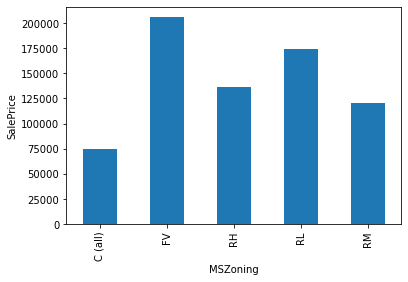

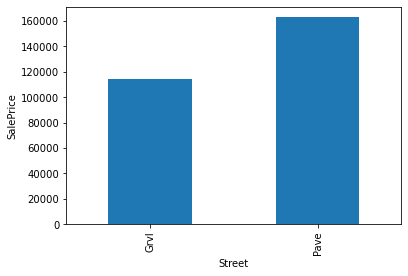

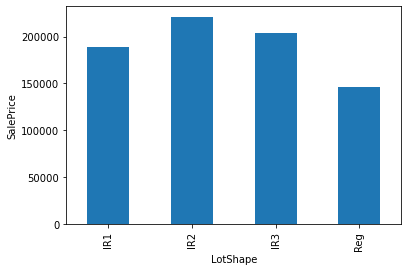

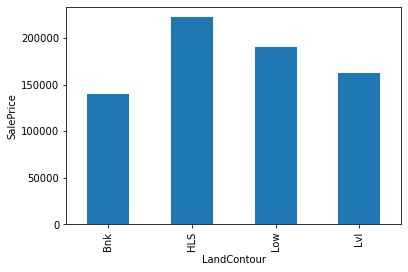

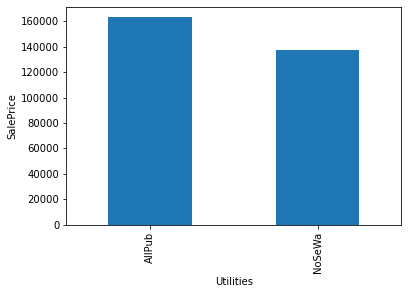

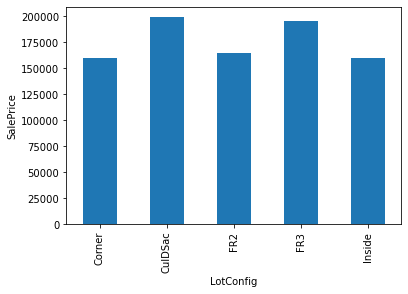

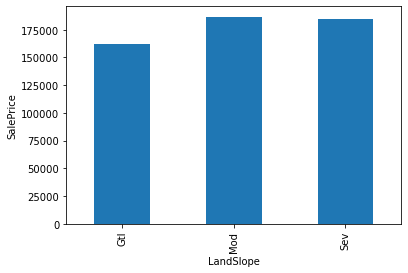

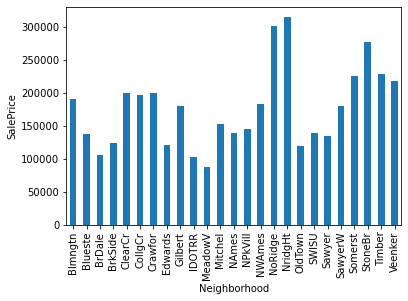

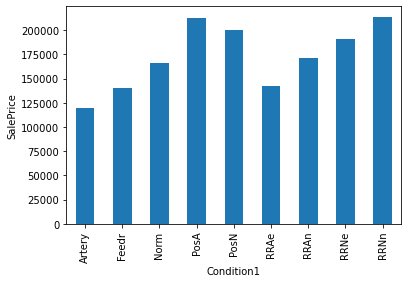

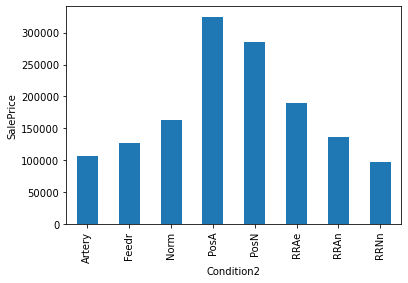

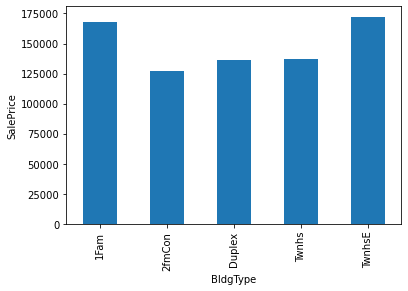

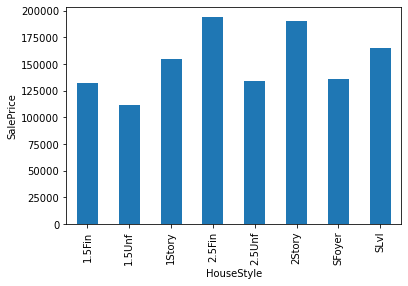

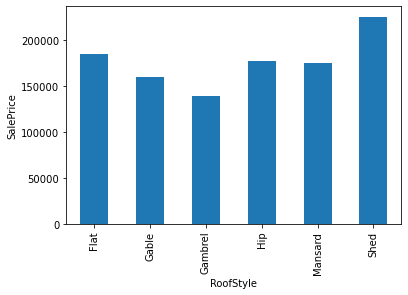

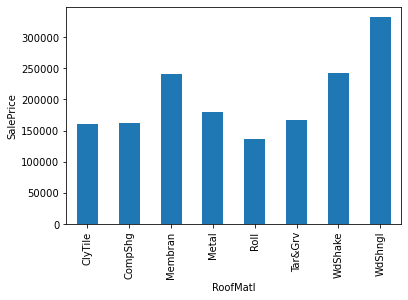

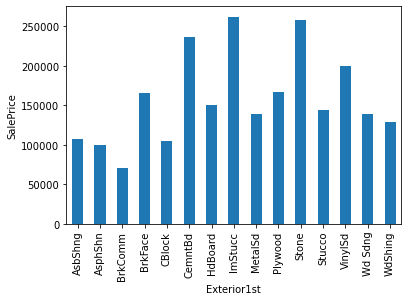

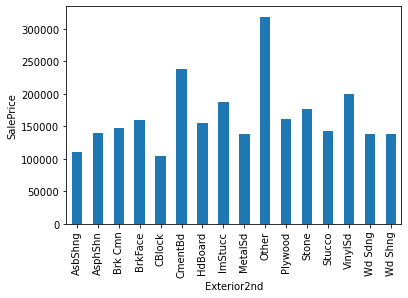

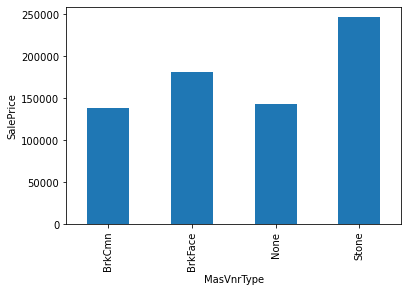

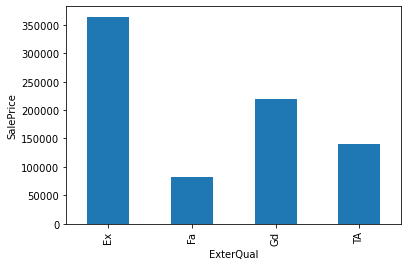

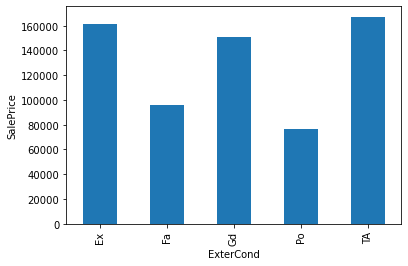

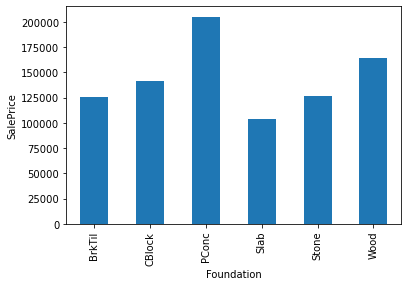

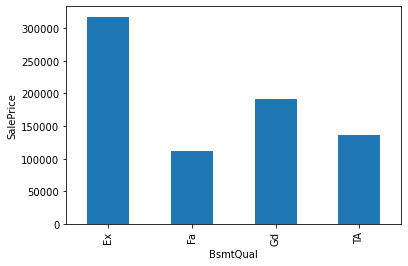

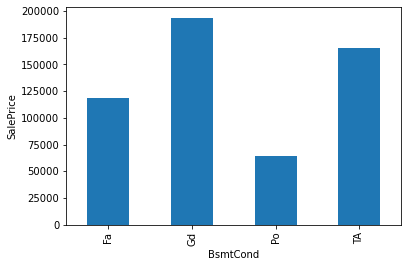

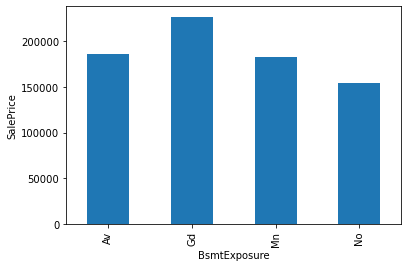

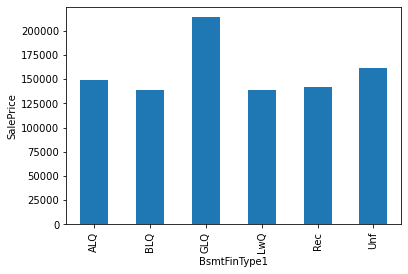

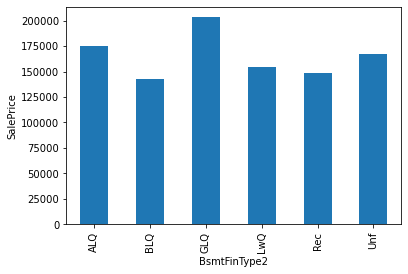

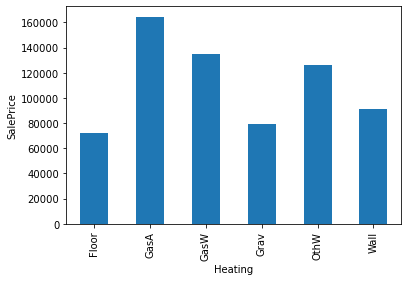

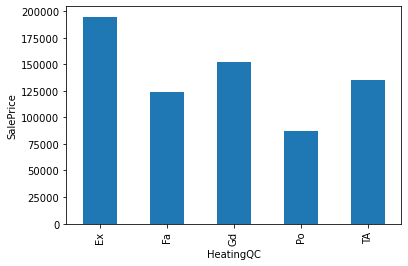

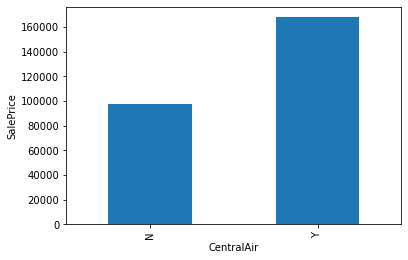

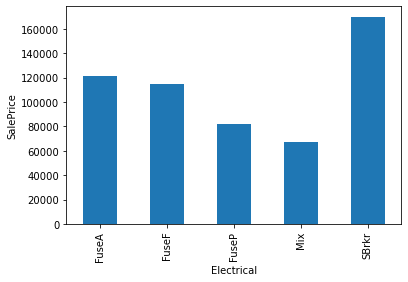

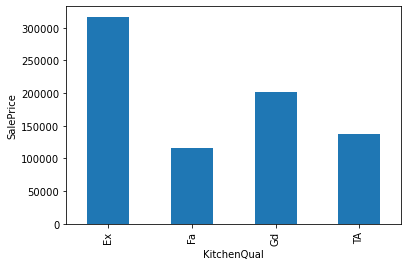

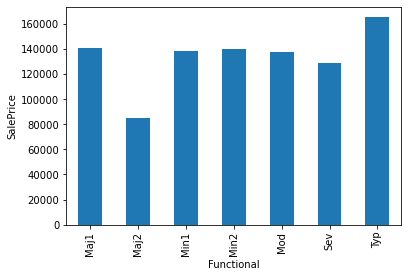

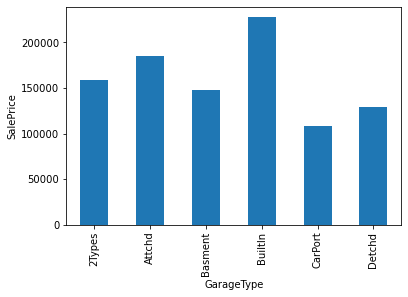

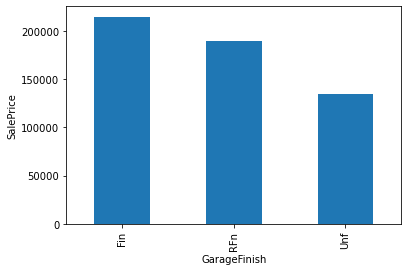

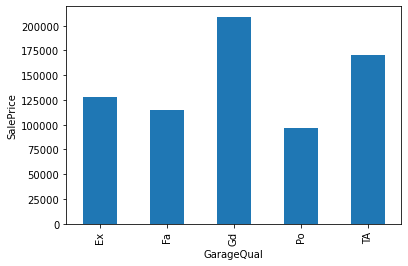

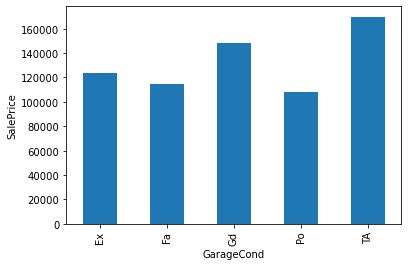

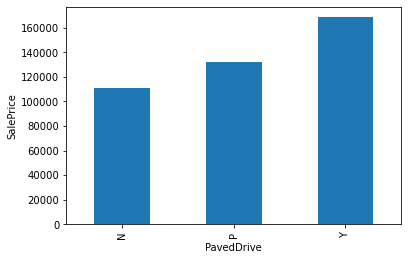

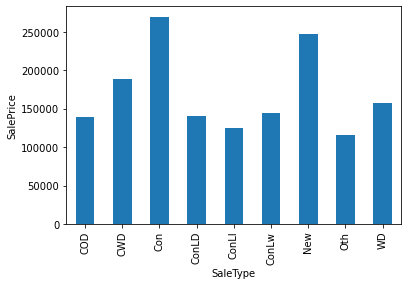

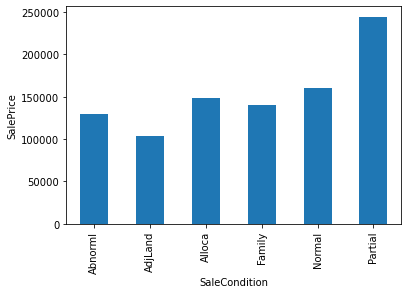

In [61]:
# Let's find out the relationship between categorical variables and dependent feature SalesPrice
for feature in categorical_features:
    df1 = df.copy()
    df1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [62]:
train_categorical_features1=train_categorical_features.copy()

In [63]:
train_categorical_features1=pd.concat([train_categorical_features,df['SalePrice']],axis=1)


In [64]:
train_categorical_features1.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [65]:
# Let's map the categories to some specific values 
for feature in categorical_features:
    labels_ordered = train_categorical_features1.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered)}
    train_categorical_features1[feature] = train_categorical_features1[feature].map(labels_ordered)

In [66]:
train_categorical_features1.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,0,1,1,0,0,16,4,4,4,6,1,2,11,12,2,2,3,5,2,2,0,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,208500
1,3,1,0,1,1,1,0,20,2,4,4,5,1,2,4,5,1,1,3,2,2,2,3,3,4,5,4,1,4,1,6,4,1,2,4,2,4,4,181500
2,3,1,1,1,1,0,0,16,4,4,4,6,1,2,11,12,2,2,3,5,2,2,1,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,223500
3,3,1,1,1,1,2,0,17,4,4,4,6,1,2,5,8,1,1,3,1,1,3,0,3,4,5,3,1,4,2,6,1,0,2,4,2,4,1,140000
4,3,1,1,1,1,1,0,24,4,4,4,6,1,2,11,12,2,2,3,5,2,2,2,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,250000


In [67]:
train_continous_feature.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,250000


In [68]:
print("Find most important features relative to target")
corr = train_continous_feature.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
MasVnrArea       0.475241
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
BsmtFinSF2      -0.011378
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

In [69]:
train_continous_feature2=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','MasVnrArea']
train_continous_feature2

['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea']

In [70]:
train_continous_feature1 = train_continous_feature[train_continous_feature2]
train_continous_feature1.head()

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,MasVnrArea
0,1710,548,856,856,196.0
1,1262,460,1262,1262,0.0
2,1786,608,920,920,162.0
3,1717,642,756,961,0.0
4,2198,836,1145,1145,350.0


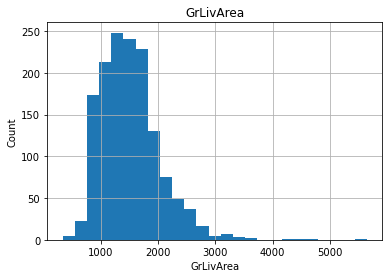

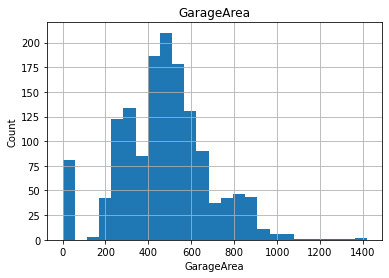

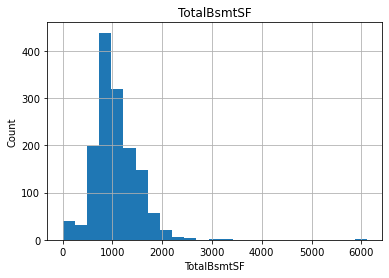

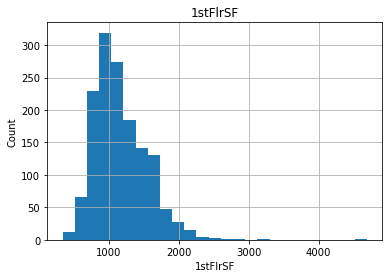

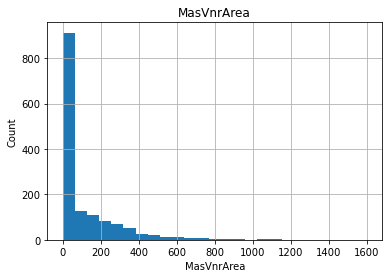

In [71]:
# Lets analyse the continuous values by creating histograms to understand the distribution
for feature in train_continous_feature2:
    df1 = train_continous_feature1.copy()
    df1[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

many features here skewness is present therefore apply log transformation to convert these features to normal distribution

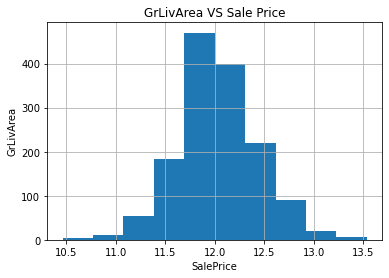

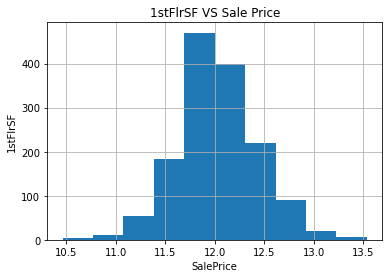

In [72]:
# Let's apply log transformation
for feature in train_continous_feature2:
    df1 = train_continous_feature1.copy()
    
    if 0 in train_continous_feature1[feature].unique():
        pass
        
    else:
        df1[feature]=np.log(train_continous_feature1[feature])
        df1['SalePrice']=np.log(df['SalePrice'])
        df1.hist('SalePrice')
        plt.xlabel('SalePrice')
        plt.ylabel(feature)
        plt.title(f'{feature} VS Sale Price')
        plt.show()


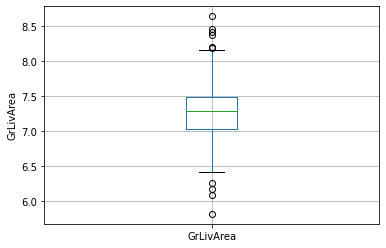

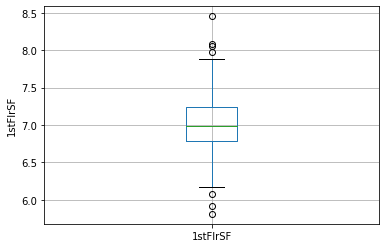

In [73]:
# Let's check out the outliers
for feature in train_continous_feature2:
    df1 = train_continous_feature1.copy()
    
    if 0 in df1[feature].unique():
        pass
    else:
        df1[feature] = np.log(df1[feature])
        df1.boxplot(column = feature)
        plt.ylabel(feature)
        plt.show()

In [74]:
df1.head()

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,MasVnrArea
0,1710,548,856,856,196.0
1,1262,460,1262,1262,0.0
2,1786,608,920,920,162.0
3,1717,642,756,961,0.0
4,2198,836,1145,1145,350.0


In [75]:
num_features1 = ['1stFlrSF', 'GrLivArea']

for feature in num_features1:
    df1[feature] = np.log(df1[feature])

In [76]:
train_continous_feature1.head()

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,MasVnrArea
0,1710,548,856,856,196.0
1,1262,460,1262,1262,0.0
2,1786,608,920,920,162.0
3,1717,642,756,961,0.0
4,2198,836,1145,1145,350.0


In [80]:
df1.head()

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,MasVnrArea
0,7.444249,548,856,6.752270,196.0
1,7.140453,460,1262,7.140453,0.0
2,7.487734,608,920,6.824374,162.0
3,7.448334,642,756,6.867974,0.0
4,7.695303,836,1145,7.043160,350.0


In [81]:
train_discrete_feature.head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,0,12


In [83]:
train_year_feature.head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [84]:
# Temporal Variables (Date Time Variables)
# Basically we are capturing the difference of years here

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    train_year_feature[feature] = train_year_feature['YrSold'] - train_year_feature[feature]

In [85]:
train_year_feature.head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [87]:
df1.head()

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,MasVnrArea
0,7.444249,548,856,6.752270,196.0
1,7.140453,460,1262,7.140453,0.0
2,7.487734,608,920,6.824374,162.0
3,7.448334,642,756,6.867974,0.0
4,7.695303,836,1145,7.043160,350.0


In [90]:
train_categorical_features1.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,0,1,1,0,0,16,4,4,4,6,1,2,11,12,2,2,3,5,2,2,0,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,208500
1,3,1,0,1,1,1,0,20,2,4,4,5,1,2,4,5,1,1,3,2,2,2,3,3,4,5,4,1,4,1,6,4,1,2,4,2,4,4,181500
2,3,1,1,1,1,0,0,16,4,4,4,6,1,2,11,12,2,2,3,5,2,2,1,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,223500
3,3,1,1,1,1,2,0,17,4,4,4,6,1,2,5,8,1,1,3,1,1,3,0,3,4,5,3,1,4,2,6,1,0,2,4,2,4,1,140000
4,3,1,1,1,1,1,0,24,4,4,4,6,1,2,11,12,2,2,3,5,2,2,2,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,250000


In [89]:
train_discrete_feature.head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,0,12


In [88]:
train_year_feature.head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [99]:
train_year_feature.isnull().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
YrSold           0
dtype: int64

In [102]:
train_year_feature['GarageYrBlt'].describe()

count    1379.000000
mean       29.306019
std        24.726881
min         0.000000
25%         6.000000
50%        28.000000
75%        47.000000
max       107.000000
Name: GarageYrBlt, dtype: float64

In [103]:
train_year_feature['GarageYrBlt']=train_year_feature['GarageYrBlt'].fillna(train_year_feature['GarageYrBlt'].mode()[0])


In [91]:
final_df = train_year_feature+train_discrete_feature+train_categorical_features1+df1

In [94]:
final_df.shape

(1460, 66)

In [104]:
final_df = pd.concat([train_year_feature,train_discrete_feature,train_categorical_features1,df1], axis=1)

In [107]:
final_df.head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,MasVnrArea
0,5,5,5.0,2008,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,0,2,3,1,0,1,1,0,0,16,4,4,4,6,1,2,11,12,2,2,3,5,2,2,0,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,208500,7.444249,548,856,6.752270,196.0
1,31,31,31.0,2007,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,0,5,3,1,0,1,1,1,0,20,2,4,4,5,1,2,4,5,1,1,3,2,2,2,3,3,4,5,4,1,4,1,6,4,1,2,4,2,4,4,181500,7.140453,460,1262,7.140453,0.0
2,7,6,7.0,2008,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,0,9,3,1,1,1,1,0,0,16,4,4,4,6,1,2,11,12,2,2,3,5,2,2,1,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,223500,7.487734,608,920,6.824374,162.0
3,91,36,8.0,2006,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,0,2,3,1,1,1,1,2,0,17,4,4,4,6,1,2,5,8,1,1,3,1,1,3,0,3,4,5,3,1,4,2,6,1,0,2,4,2,4,1,140000,7.448334,642,756,6.867974,0.0
4,8,8,8.0,2008,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,0,12,3,1,1,1,1,1,0,24,4,4,4,6,1,2,11,12,2,2,3,5,2,2,2,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,250000,7.695303,836,1145,7.043160,350.0


In [109]:
# Let's check the number of variables on which scaling needs to be performed
scaling_feature = [feature for feature in final_df.columns if feature not in ['Id','SalePrice']]
len(scaling_feature)

65

In [110]:
final_df[scaling_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,MasVnrArea
0,5,5,5.0,2008,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,0,2,3,1,0,1,1,0,0,16,4,4,4,6,1,2,11,12,2,2,3,5,2,2,0,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,7.444249,548,856,6.752270,196.0
1,31,31,31.0,2007,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,0,5,3,1,0,1,1,1,0,20,2,4,4,5,1,2,4,5,1,1,3,2,2,2,3,3,4,5,4,1,4,1,6,4,1,2,4,2,4,4,7.140453,460,1262,7.140453,0.0
2,7,6,7.0,2008,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,0,9,3,1,1,1,1,0,0,16,4,4,4,6,1,2,11,12,2,2,3,5,2,2,1,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,7.487734,608,920,6.824374,162.0
3,91,36,8.0,2006,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,0,2,3,1,1,1,1,2,0,17,4,4,4,6,1,2,5,8,1,1,3,1,1,3,0,3,4,5,3,1,4,2,6,1,0,2,4,2,4,1,7.448334,642,756,6.867974,0.0
4,8,8,8.0,2008,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,0,12,3,1,1,1,1,1,0,24,4,4,4,6,1,2,11,12,2,2,3,5,2,2,2,5,4,5,4,1,4,2,6,4,1,2,4,2,4,4,7.695303,836,1145,7.043160,350.0


In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(final_df[scaling_feature])

MinMaxScaler()

In [112]:
scaler.transform(final_df[scaling_feature])

array([[0.03676471, 0.09836066, 0.04672897, ..., 0.1400982 , 0.35615475,
        0.1225    ],
       [0.22794118, 0.52459016, 0.28971963, ..., 0.20654664, 0.50305602,
        0.        ],
       [0.05147059, 0.1147541 , 0.06542056, ..., 0.15057283, 0.38344104,
        0.10125   ],
       ...,
       [0.50735294, 0.08196721, 0.64485981, ..., 0.18854337, 0.4801886 ,
        0.        ],
       [0.44117647, 0.24590164, 0.56074766, ..., 0.17643208, 0.44341859,
        0.        ],
       [0.31617647, 0.72131148, 0.40186916, ..., 0.20556465, 0.50125252,
        0.        ]])

In [114]:
# transform the train and test set, and add on the Id and SalePrice variables
final_df = pd.concat([final_df[['SalePrice']].reset_index(drop = True),pd.DataFrame(scaler.transform(final_df[scaling_feature]), columns = scaling_feature)],axis = 1)

In [115]:
final_df.head()

,SalePrice,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,MasVnrArea
0,208500,0.036765,0.098361,0.046729,0.50,0.235294,0.666667,0.500,0.0,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.50,0.0,0.0,0.0,0.0,0.090909,0.75,1.0,0.000000,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.2,0.285714,0.785714,0.800000,0.666667,0.666667,0.75,1.0,0.666667,0.666667,0.000000,1.0,0.8,1.0,1.00,1.0,1.0,0.666667,1.0,0.8,0.5,0.5,1.0,1.0,0.5,0.8,0.577712,0.386460,0.140098,0.356155,0.12250
1,181500,0.227941,0.524590,0.289720,0.25,0.000000,0.555556,0.875,0.0,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.50,0.0,0.0,0.0,0.0,0.363636,0.75,1.0,0.000000,0.333333,1.0,0.25,0.0,0.833333,0.25,0.571429,1.0,0.714286,0.2,0.285714,0.285714,0.333333,0.333333,0.333333,0.75,0.4,0.666667,0.666667,1.000000,0.6,0.8,1.0,1.00,1.0,1.0,0.333333,1.0,0.8,0.5,0.5,1.0,1.0,0.5,0.8,0.470245,0.324401,0.206547,0.503056,0.00000
2,223500,0.051471,0.114754,0.065421,0.50,0.235294,0.666667,0.500,0.0,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.0,0.0,0.0,0.0,0.727273,0.75,1.0,0.333333,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.2,0.285714,0.785714,0.800000,0.666667,0.666667,0.75,1.0,0.666667,0.666667,0.333333,1.0,0.8,1.0,1.00,1.0,1.0,0.666667,1.0,0.8,0.5,0.5,1.0,1.0,0.5,0.8,0.593095,0.428773,0.150573,0.383441,0.10125
3,140000,0.669118,0.606557,0.074766,0.00,0.294118,0.666667,0.500,0.0,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.75,0.0,0.0,0.0,0.0,0.090909,0.75,1.0,0.333333,0.333333,1.0,0.50,0.0,0.708333,0.50,0.571429,1.0,0.857143,0.2,0.285714,0.357143,0.533333,0.333333,0.333333,0.75,0.2,0.333333,1.000000,0.000000,0.6,0.8,1.0,0.75,1.0,1.0,0.666667,1.0,0.2,0.0,0.5,1.0,1.0,0.5,0.2,0.579157,0.452750,0.123732,0.399941,0.00000
4,250000,0.058824,0.147541,0.074766,0.50,0.235294,0.777778,0.500,0.0,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.75,0.0,0.0,0.0,0.0,1.000000,0.75,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.50,0.571429,1.0,0.857143,0.2,0.285714,0.785714,0.800000,0.666667,0.666667,0.75,1.0,0.666667,0.666667,0.666667,1.0,0.8,1.0,1.00,1.0,1.0,0.666667,1.0,0.8,0.5,0.5,1.0,1.0,0.5,0.8,0.666523,0.589563,0.187398,0.466237,0.21875


In [116]:
# Creating X_train and y_train 
X_train = final_df.drop(['SalePrice'], axis = 1)
y_train = final_df['SalePrice']

In [117]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [118]:
model_sel_feature = SelectFromModel(Lasso(alpha = 0.005, random_state = 49))
model_sel_feature.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=49))

In [119]:
# get_support() will show an array of boolean values i.e. which features are selected and which are not
model_sel_feature.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [120]:
selected_feat = X_train.columns[model_sel_feature.get_support()]

# Let's print some stats
print(f"Total Features : {len(X_train.columns)}")
print(f"Features Selected : {len(selected_feat)}")
print(f"features with coefficients shrank to zero: {np.sum(model_sel_feature.estimator_.coef_ == 0)}")

Total Features : 65
Features Selected : 65
features with coefficients shrank to zero: 0


In [121]:
selected_feat

Index(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MSSubClass',
       'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'MSZoning', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
       'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea'],
      dtype=

In [122]:
X_train = X_train[selected_feat]

In [123]:
y=final_df['SalePrice']
X=final_df.drop(['SalePrice'],axis=1)

R^2 is: 
 0.7968666409745174
RMSE is: 
 1491281486.997861


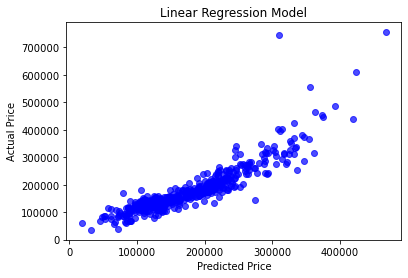

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(X_train, y_train)

print ("R^2 is: \n", model.score(X_test, y_test))

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()
